In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [1]:
# Load the saved model
model = tf.keras.models.load_model('./models/v4_last.h5')

def preprocess_image(file):
    kernelOpen = np.ones((5, 5))
    kernelClose = np.ones((20, 20))

    # Read RGB image
    rgb = cv2.imread(file)

    # Convert BGR to HSV
    hsv = cv2.cvtColor(rgb, cv2.COLOR_BGR2HSV)

    lower_white = np.array([0, 0, 168])
    upper_white = np.array([172, 111, 255])

    whitemask = cv2.inRange(hsv, lower_white, upper_white)

    # Inverse white mask to detect non-white regions
    non_whitemask = cv2.bitwise_not(whitemask)

    # Add a range for grey colors (adjust the thresholds based on your needs)
    lower_grey = np.array([0, 0, 100])
    upper_grey = np.array([172, 30, 255])

    # Create a mask for grey colors
    greymask = cv2.inRange(hsv, lower_grey, upper_grey)

    # Combine masks to exclude white and grey regions
    non_whitemask_no_grey = cv2.bitwise_and(non_whitemask, cv2.bitwise_not(greymask))

    # Apply open morphological operation
    maskOpen = cv2.morphologyEx(non_whitemask_no_grey, cv2.MORPH_OPEN, kernelOpen)

    # Apply close morphological operation
    maskClose = cv2.morphologyEx(maskOpen, cv2.MORPH_CLOSE, kernelClose)

    # Final mask after closing
    maskFinal = maskClose

    # Bitwise and to apply the mask to the HSV image
    maskFinally = cv2.bitwise_and(hsv, hsv, mask=maskFinal)

    # Convert back to RGB
    masked_rgb = cv2.cvtColor(maskFinally, cv2.COLOR_HSV2BGR)

    # Resize the image to 256x256
    resized_image = cv2.resize(maskFinally, (300, 300), interpolation=cv2.INTER_AREA)

    # Normalize the image
    img_array = resized_image / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array, resized_image

img_path = './pisang.jpg'

# Preprocess the image
img_array, processed_image = preprocess_image(img_path)

# Print prediction
predictions = model.predict(img_array)

labels = ['Manggis', 'Pisang', 'Rambutan']
predicted_index = np.argmax(predictions, axis=1)[0]
print("Predictions:", labels[predicted_index])

print("\nConfidence result: ")
for i, j in enumerate(predictions[0]):
    print(labels[i], "\t:  ", j)

# Display the processed image with predictions
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
plt.title(f'Processed Image')
plt.axis('off')

# Remove the batch dimension for displaying img_array
img_display = np.squeeze(img_array, axis=0)

# Display the normalized image array
plt.subplot(1, 2, 2)
plt.imshow(img_display)
plt.title(f'Predictions: {labels[predicted_index]}')
plt.axis('off')

plt.show()


NameError: name 'tf' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Predictions: Manggis

Confidence result: 
Manggis 	:   0.9982217
Pisang 	:   0.001778283
Rambutan 	:   4.0713856e-12


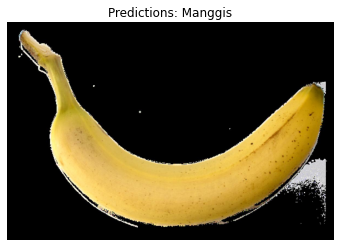

In [39]:
# Load the saved model
model = tf.keras.models.load_model('./models/v3.keras')

def preprocess_image(img_path):
    # Convert image to RGB format and save as JPEG if needed
    img = Image.open(img_path)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img.save(img_path.replace('.png', '.jpg'), 'JPEG')

    # Load and resize the image
    img = image.load_img(img_path.replace('.png', '.jpg'), target_size=(300, 300))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# img_path = './rgb_masking/train/Rambutan/masking_Rambutan_6.jpg'
img_path = './banana.png'

# Print prediction
img_array = preprocess_image(img_path)
predictions = model.predict(img_array)

labels = ['Manggis', 'Pisang', 'Rambutan']
predicted_index = np.argmax(predictions, axis=1)[0]
print("Predictions:", labels[predicted_index])

print("\nConfidence result: ")
for i, j in enumerate(predictions[0]):
    print(labels[i], "\t:  ", j)

plt.imshow(image.load_img(img_path.replace('.png', '.jpg')))
plt.title(f'Predictions: {labels[predicted_index]}')
plt.axis('off')
plt.show()


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

test_dir = "./dataset/val"
test_generator = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.7)

In [11]:
test_images = test_generator.flow_from_directory(test_dir,
                                                target_size = (300, 300),
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                batch_size=32,
                                                shuffle=False,
                                                seed=42,
                                                subset='validation')

Found 219 images belonging to 3 classes.


Found 315 images belonging to 3 classes.


c:\Users\CATURWARGA COMPUTER\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 271ms/step
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000


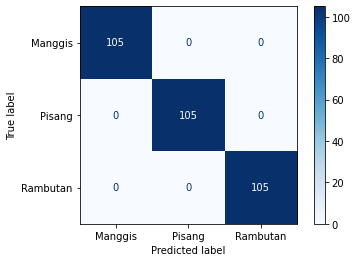

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score


model = tf.keras.models.load_model("./models/v2.keras")
datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='sparse',  # Assuming sparse labels
    shuffle=False
)

# Get the true labels from the generator
true_labels = validation_generator.classes

# Predict the classes for the validation data
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(true_labels, predicted_classes)
precision = precision_score(true_labels, predicted_classes, average='macro')  # Use 'micro' or 'weighted' as needed
recall = recall_score(true_labels, predicted_classes, average='macro')  # Use 'micro' or 'weighted' as needed

# Print accuracy, precision, and recall
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()

### RGB_Segmentation

### HSV_Segmentation